In [16]:
import cv2
import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm 
import os 
import pickle
from PIL import Image
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from tensorflow.keras.models import model_from_json, load_model

In [53]:
path = './'
image_path = os.path.join(path, 'VOC_PCB/JPEGImages')
annotate_path = os.path.join(path, 'VOC_PCB/Annotations')

In [5]:
def mapping(x):
    if x =='missing_hole':
        return 1
    elif x == 'mouse_bite':
        return 2
    elif x == 'open_circuit':
        return 3
    elif x == 'short':
        return 4
    elif x == 'spurious_copper':
        return 5
    elif x == 'spur':
        return 6

In [1]:
from utils import *

  0%|          | 0/10668 [00:00<?, ?it/s]

  0%|          | 0/10668 [00:00<?, ?it/s]

In [11]:
bbox_for_all_image = bbox_for_all_image[:5334]
boxarr=boxarr[:5334]

In [109]:
savedModel=load_model('model best.h5')

(128, 128)


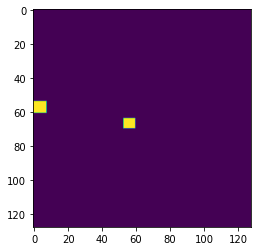

In [110]:
sample = bbox_for_all_image[40]
test= savedModel.predict(tf.reshape(sample,(-1,128,128,1)))
# checking 2nd axis to look for defect bounding box
test1 = np.argmax(test[0],axis=2)
print(test1.shape)
plt.imshow(test1)


In [117]:
def plot_to_compare(ids:int):
    print('                                     ids: {}'.format(ids))
    
    predicted = savedModel.predict(tf.reshape(bbox_for_all_image[ids],(-1,128,128,1)))
    filter_pred = np.argmax(predicted[0],axis=2)
    
    fig, ax = plt.subplots(1,3,figsize=(10, 10))
    ax[0].imshow(bbox_for_all_image[ids])
    ax[0].set_title('PCB Image')
    
    ax[1].imshow(boxarr[ids])
    ax[1].set_title('Bounding box Original')
    
    
    ax[2].imshow(filter_pred)
    ax[2].set_title('Bounding box Predicted')
    
    
    plt.show()

                                     ids: 4799


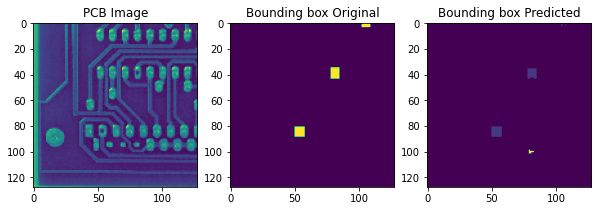

                                     ids: 436


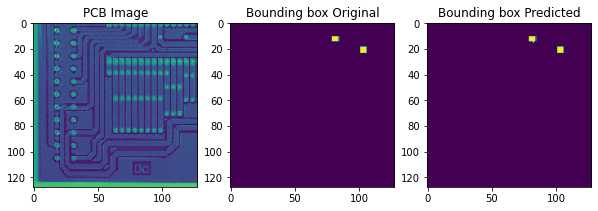

                                     ids: 196


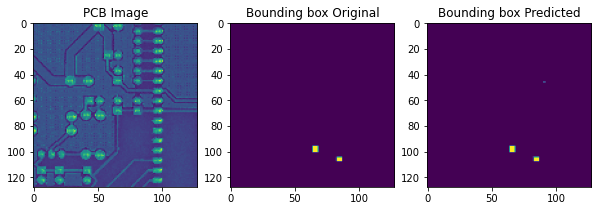

                                     ids: 907


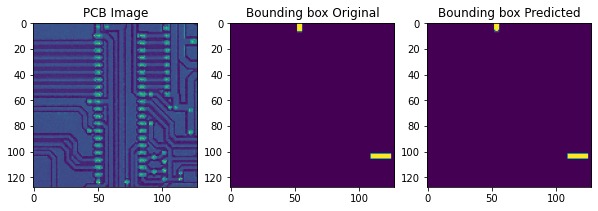

                                     ids: 4896


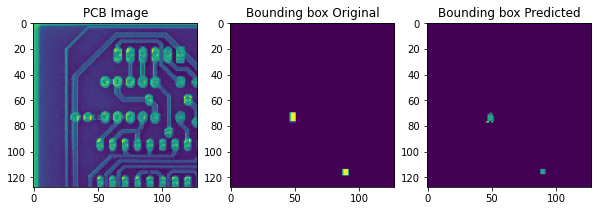

                                     ids: 3648


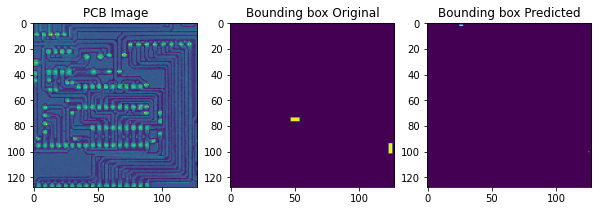

                                     ids: 2074


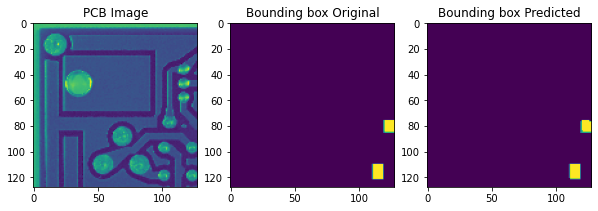

                                     ids: 4125


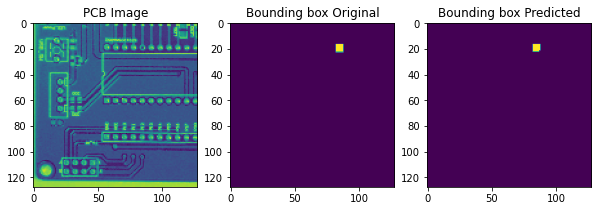

                                     ids: 1107


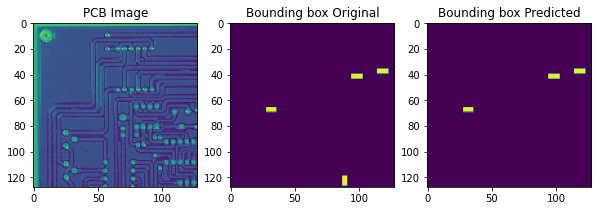

                                     ids: 3972


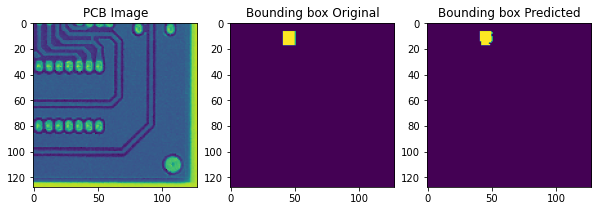

In [118]:
for i in np.random.randint(len(boxarr), size=10):
    plot_to_compare(i)